In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# I. Data Preparation

### 1. Import Data
- wines_SPA.csv: __wine__ dataset containing basic features and outcome
- City.csv: __city__ dataset containing longitude and latitude

In [2]:
wine = pd.read_csv("wines_SPA.csv")
city = pd.read_csv("City.csv")

In [3]:
wine.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB


In [5]:
city.head()

,objectId,muni,featureCode,countryCode,cityId,ACL,name,population,updatedAt,location,country,createdAt,adminCode,muniSub
0,lDhq7oHAUI,6159.0,PPL,ES,2509368,NaN,Zahinos,2934,Thu Dec 12 2019 14:15:43 GMT-0600 (Central Sta...,"{""__type"":""GeoPoint"",""latitude"":38.33135,""long...",Spain,Thu Dec 12 2019 14:15:43 GMT-0600 (Central Sta...,57,NaN
1,W2zcg5FH9V,11007.0,PPL,ES,2509369,NaN,Zahara de los Atunes,1307,Thu Dec 12 2019 14:15:43 GMT-0600 (Central Sta...,"{""__type"":""GeoPoint"",""latitude"":36.1369,""longi...",Spain,Thu Dec 12 2019 14:15:43 GMT-0600 (Central Sta...,51,NaN
2,GaMhIalujH,18913.0,PPLA3,ES,2509374,NaN,Zagra,1092,Thu Dec 12 2019 14:15:43 GMT-0600 (Central Sta...,"{""__type"":""GeoPoint"",""latitude"":37.25561,""long...",Spain,Thu Dec 12 2019 14:15:43 GMT-0600 (Central Sta...,51,NaN
3,vdUokEPDDU,18192.0,PPLA3,ES,2509379,NaN,Zafarraya,2181,Thu Dec 12 2019 14:15:43 GMT-0600 (Central Sta...,"{""__type"":""GeoPoint"",""latitude"":36.97554,""long...",Spain,Thu Dec 12 2019 14:15:43 GMT-0600 (Central Sta...,51,NaN
4,YhVLm2urU2,4103.0,PPLA3,ES,2509293,NaN,Zurgena,2317,Thu Dec 12 2019 14:15:43 GMT-0600 (Central Sta...,"{""__type"":""GeoPoint"",""latitude"":37.34218,""long...",Spain,Thu Dec 12 2019 14:15:43 GMT-0600 (Central Sta...,51,NaN


In [6]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6913 entries, 0 to 6912
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   objectId     6913 non-null   object 
 1   muni         6912 non-null   float64
 2   featureCode  6913 non-null   object 
 3   countryCode  6913 non-null   object 
 4   cityId       6913 non-null   int64  
 5   ACL          0 non-null      float64
 6   name         6913 non-null   object 
 7   population   6913 non-null   int64  
 8   updatedAt    6913 non-null   object 
 9   location     6913 non-null   object 
 10  country      6913 non-null   object 
 11  createdAt    6913 non-null   object 
 12  adminCode    6913 non-null   object 
 13  muniSub      139 non-null    float64
dtypes: float64(3), int64(2), object(9)
memory usage: 756.2+ KB


### 2. Merge Datasets

- change to lower case: `region`, `winery`, `wine`, `country`, `type` in __wine__, `name` (region) in __city__
- extract longtitude and latitude from `location` in __city__
- collect useful features `region`, `latitude`, `longitude` from __city__, exclude `country` from __wine__
- merge __wine__ and __city__ on `region` as __merged__

In [7]:
# change to lower case
wine["region"] = wine["region"].str.lower()
wine["winery"] = wine["winery"].str.lower()
wine["wine"] = wine["wine"].str.lower()
wine["country"] = wine["country"].str.lower()
wine["type"] = wine["type"].str.lower()

city["name"] = city["name"].str.lower()

In [8]:
# extract latitude and longitude from location
import json
l_location = list(city.location)
longi = []
lati = []
for per in l_location:
  per = json.loads(per)
  longi.append(per['latitude'])
  lati.append(per['longitude'])

# create 2 new columns city dataset
city['latitude'] = lati
city['longitude'] = longi

In [9]:
# change column name: name -> region 
city = city.rename({'name': 'region'}, axis=1)

# collect data from city
city = city.loc[:,('region','latitude','longitude')]

# exclude country in wine since all are espana
wine.drop("country", inplace=True, axis = 1)

In [10]:
# merge 2 datasets together
merged = wine.merge(city, how = "inner", on = "region")
merged

,winery,wine,year,rating,num_reviews,region,price,type,body,acidity,latitude,longitude
0,teso la monja,tinto,2013,4.9,58,toro,995.00,toro red,5.0,3.0,-5.39534,41.52417
1,ordonez,vatan arena tinta de toro,2014,4.8,79,toro,369.05,toro red,5.0,3.0,-5.39534,41.52417
2,teso la monja,tinto,2012,4.8,56,toro,1190.00,toro red,5.0,3.0,-5.39534,41.52417
3,teso la monja,tinto,2009,4.8,50,toro,950.00,toro red,5.0,3.0,-5.39534,41.52417
4,teso la monja,tinto,2011,4.8,32,toro,1295.00,toro red,5.0,3.0,-5.39534,41.52417
...,...,...,...,...,...,...,...,...,...,...,...,...
3060,breca,brega garnacha,2017,4.3,317,calatayud,27.90,grenache,5.0,3.0,-1.64318,41.35353
3061,bodegas ateca,atteca armas garnacha old vines,2017,4.3,176,calatayud,32.90,grenache,5.0,3.0,-1.64318,41.35353
3062,de muller,vermouth reserva,N.V.,4.3,129,tarragona,10.45,NaN,NaN,NaN,1.25000,41.11667
3063,vinyes del terrer,nus del terrer,2016,4.3,28,tarragona,25.90,red,4.0,3.0,1.25000,41.11667


### 3. Manage Special Values
- replaced in "N.V." with null in `year`
- dropped null values based on all columns
- turn `year` into a numeric column from string column
- dropped duplicated rows
- reset index after dropping values

In [11]:
# replace improper values
merged['year'][merged.year == "N.V."] = None

<ipython-input-11-a141e92882ac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged['year'][merged.year == "N.V."] = None


In [12]:
# drop null values
merged.dropna(inplace = True)

In [13]:
# fix year's data format
merged['year'] = pd.to_numeric(merged['year'])

In [14]:
# drop duplicated rows
merged = merged.drop_duplicates()

In [15]:
merged.reset_index(drop=True, inplace=True)

In [16]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 591 entries, 0 to 590
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       591 non-null    object 
 1   wine         591 non-null    object 
 2   year         591 non-null    int64  
 3   rating       591 non-null    float64
 4   num_reviews  591 non-null    int64  
 5   region       591 non-null    object 
 6   price        591 non-null    float64
 7   type         591 non-null    object 
 8   body         591 non-null    float64
 9   acidity      591 non-null    float64
 10  latitude     591 non-null    float64
 11  longitude    591 non-null    float64
dtypes: float64(6), int64(2), object(4)
memory usage: 55.5+ KB


### 4. Dummy Coding for Categorical Variables
- dummy-code `winery` and `type`
- considering latitude and longtitude together presnet a region, we decide to drop region to avoid repeated columns

In [17]:
# create dummies for winery and type
dummies = pd.get_dummies(merged[["winery", "type"]]).reset_index(drop = True)

# combine merge and dunmmies
clean = pd.concat([merged, dummies], axis = 1)
clean.drop(["type", "region", "winery"], axis = 1, inplace = True)

In [18]:
clean

,wine,year,rating,num_reviews,price,body,acidity,latitude,longitude,winery_abel mendoza monge,...,type_monastrell,type_red,type_rioja red,type_rioja white,type_sauvignon blanc,type_sparkling,type_syrah,type_tempranillo,type_toro red,type_verdejo
0,tinto,2013,4.9,58,995.00,5.0,3.0,-5.39534,41.52417,0,...,0,0,0,0,0,0,0,0,1,0
1,vatan arena tinta de toro,2014,4.8,79,369.05,5.0,3.0,-5.39534,41.52417,0,...,0,0,0,0,0,0,0,0,1,0
2,tinto,2012,4.8,56,1190.00,5.0,3.0,-5.39534,41.52417,0,...,0,0,0,0,0,0,0,0,1,0
3,tinto,2009,4.8,50,950.00,5.0,3.0,-5.39534,41.52417,0,...,0,0,0,0,0,0,0,0,1,0
4,tinto,2011,4.8,32,1295.00,5.0,3.0,-5.39534,41.52417,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,blanc de neu,2016,4.3,45,16.99,2.0,3.0,2.29451,41.49379,0,...,0,0,0,0,0,1,0,0,0,0
587,brega garnacha,2017,4.3,317,27.90,5.0,3.0,-1.64318,41.35353,0,...,0,0,0,0,0,0,0,0,0,0
588,atteca armas garnacha old vines,2017,4.3,176,32.90,5.0,3.0,-1.64318,41.35353,0,...,0,0,0,0,0,0,0,0,0,0
589,nus del terrer,2016,4.3,28,25.90,4.0,3.0,1.25000,41.11667,0,...,0,1,0,0,0,0,0,0,0,0


### 5. Set Index
- use `wine` as index

In [19]:
clean.set_index(['wine'], inplace=True)
clean.head()

,year,rating,num_reviews,price,body,acidity,latitude,longitude,winery_abel mendoza monge,winery_age,...,type_monastrell,type_red,type_rioja red,type_rioja white,type_sauvignon blanc,type_sparkling,type_syrah,type_tempranillo,type_toro red,type_verdejo
wine,,,,,,,,,,,,,,,,,,,,,
tinto,2013,4.9,58,995.00,5.0,3.0,-5.39534,41.52417,0,0,...,0,0,0,0,0,0,0,0,1,0
vatan arena tinta de toro,2014,4.8,79,369.05,5.0,3.0,-5.39534,41.52417,0,0,...,0,0,0,0,0,0,0,0,1,0
tinto,2012,4.8,56,1190.00,5.0,3.0,-5.39534,41.52417,0,0,...,0,0,0,0,0,0,0,0,1,0
tinto,2009,4.8,50,950.00,5.0,3.0,-5.39534,41.52417,0,0,...,0,0,0,0,0,0,0,0,1,0
tinto,2011,4.8,32,1295.00,5.0,3.0,-5.39534,41.52417,0,0,...,0,0,0,0,0,0,0,0,1,0


In [20]:
# set wine as index
merged.set_index(['wine'], inplace=True)
merged.head()

,winery,year,rating,num_reviews,region,price,type,body,acidity,latitude,longitude
wine,,,,,,,,,,,
tinto,teso la monja,2013,4.9,58,toro,995.00,toro red,5.0,3.0,-5.39534,41.52417
vatan arena tinta de toro,ordonez,2014,4.8,79,toro,369.05,toro red,5.0,3.0,-5.39534,41.52417
tinto,teso la monja,2012,4.8,56,toro,1190.00,toro red,5.0,3.0,-5.39534,41.52417
tinto,teso la monja,2009,4.8,50,toro,950.00,toro red,5.0,3.0,-5.39534,41.52417
tinto,teso la monja,2011,4.8,32,toro,1295.00,toro red,5.0,3.0,-5.39534,41.52417


### 5. Prepare a Scaled Version

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scale = clean.copy()
scale['trans_year'] = scaler.fit_transform(scale.loc[:,['year']])
scale['trans_num_reviews'] = scaler.fit_transform(scale.loc[:,['num_reviews']])
scale['trans_price']=scaler.fit_transform(scale.loc[:,['price']])
scale['trans_body']=scaler.fit_transform(scale.loc[:,['body']])
scale['trans_acidity']=scaler.fit_transform(scale.loc[:,['acidity']])
scale['trans_latitude']=scaler.fit_transform(scale.loc[:,['latitude']])
scale['trans_longitude']=scaler.fit_transform(scale.loc[:,['longitude']])

scale.drop(['year','num_reviews','price','body','acidity','latitude','longitude'], axis=1, inplace=True)
scale.head()

,rating,winery_abel mendoza monge,winery_age,winery_allende,winery_alonso & pedrajo,winery_alta alella,winery_altanza,winery_altos de rioja,winery_alvaro palacios,winery_artadi,...,type_tempranillo,type_toro red,type_verdejo,trans_year,trans_num_reviews,trans_price,trans_body,trans_acidity,trans_latitude,trans_longitude
wine,,,,,,,,,,,,,,,,,,,,,
tinto,4.9,0,0,0,0,0,0,0,0,0,...,0,1,0,0.239639,-0.425230,4.607894,1.921296,0.101274,-2.176241,2.247398
vatan arena tinta de toro,4.8,0,0,0,0,0,0,0,0,0,...,0,1,0,0.326208,-0.409411,1.382347,1.921296,0.101274,-2.176241,2.247398
tinto,4.8,0,0,0,0,0,0,0,0,0,...,0,1,0,0.153070,-0.426736,5.612737,1.921296,0.101274,-2.176241,2.247398
tinto,4.8,0,0,0,0,0,0,0,0,0,...,0,1,0,-0.106636,-0.431256,4.376007,1.921296,0.101274,-2.176241,2.247398
tinto,4.8,0,0,0,0,0,0,0,0,0,...,0,1,0,0.066501,-0.444814,6.153807,1.921296,0.101274,-2.176241,2.247398


### 6. Train-Test Split for Predictors and Outcome
- split train set (80%) and test set (20%)
- seperate predictors (X) and outcome (y)

In [22]:
# train-test split for dummy-coded data
X = clean[[c for c in clean.columns if c != "rating"]]
y = clean["rating"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [23]:
print("training set:", X_train.shape,
      "\ntesting set:", X_test.shape)

training set: (472, 152) 
testing set: (119, 152)


In [24]:
# train-test split for raw data
X2 = merged[[c for c in merged.columns if c != "rating"]]
y2 = merged["rating"]
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2, random_state = 42)

In [25]:
# train-test split for scaled data
X3 = scale[[c for c in scale.columns if c != "rating"]]
y3 = scale["rating"]
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size = 0.2, random_state = 42)

# II. Data Exploration

### 1. Summary Statistics

In [26]:
merged[[c for c in merged.columns if c != "rating"]].describe()

,year,num_reviews,price,body,acidity,latitude,longitude
count,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000
mean,2010.231810,622.529611,100.791675,4.062606,2.989848,-2.735054,37.808174
std,11.561277,1328.712177,194.224480,0.488310,0.100331,1.223458,1.654867
min,1925.000000,25.000000,6.260000,2.000000,2.000000,-6.289100,36.526720
25%,2009.000000,57.000000,31.115000,4.000000,3.000000,-2.463020,36.945080
50%,2014.000000,176.000000,50.000000,4.000000,3.000000,-2.463020,36.945080
75%,2016.000000,667.500000,93.975000,4.000000,3.000000,-2.463020,37.466060
max,2021.000000,16505.000000,2814.160000,5.000000,3.000000,2.294510,41.757800


### 2. check normality

<AxesSubplot:xlabel='rating', ylabel='Count'>

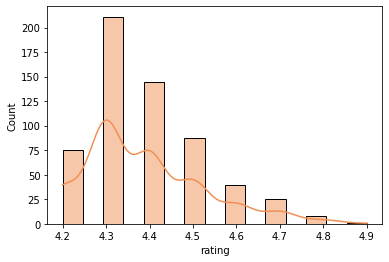

In [27]:
# check normality of rating using histogram
sns.histplot(clean["rating"], color = "#f09054", kde=True)

### 3. Investigate Correlation

In [28]:
merged.corr()

<ipython-input-28-c6ad84058222>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  merged.corr()


,year,rating,num_reviews,price,body,acidity,latitude,longitude
year,1.000000,-0.030899,0.071021,-0.272674,0.014538,-0.009657,-0.046031,0.197451
rating,-0.030899,1.000000,-0.213110,0.457435,0.156208,-0.010186,-0.168926,0.179990
num_reviews,0.071021,-0.213110,1.000000,-0.096345,0.058192,0.041692,-0.015095,-0.013246
price,-0.272674,0.457435,-0.096345,1.000000,0.176910,0.005594,-0.200412,0.150087
body,0.014538,0.156208,0.058192,0.176910,1.000000,0.012995,-0.323485,0.446391
acidity,-0.009657,-0.010186,0.041692,0.005594,0.012995,1.000000,0.048819,-0.043010
latitude,-0.046031,-0.168926,-0.015095,-0.200412,-0.323485,0.048819,1.000000,-0.623131
longitude,0.197451,0.179990,-0.013246,0.150087,0.446391,-0.043010,-0.623131,1.000000


<ipython-input-29-a349957defaf>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = merged.corr()


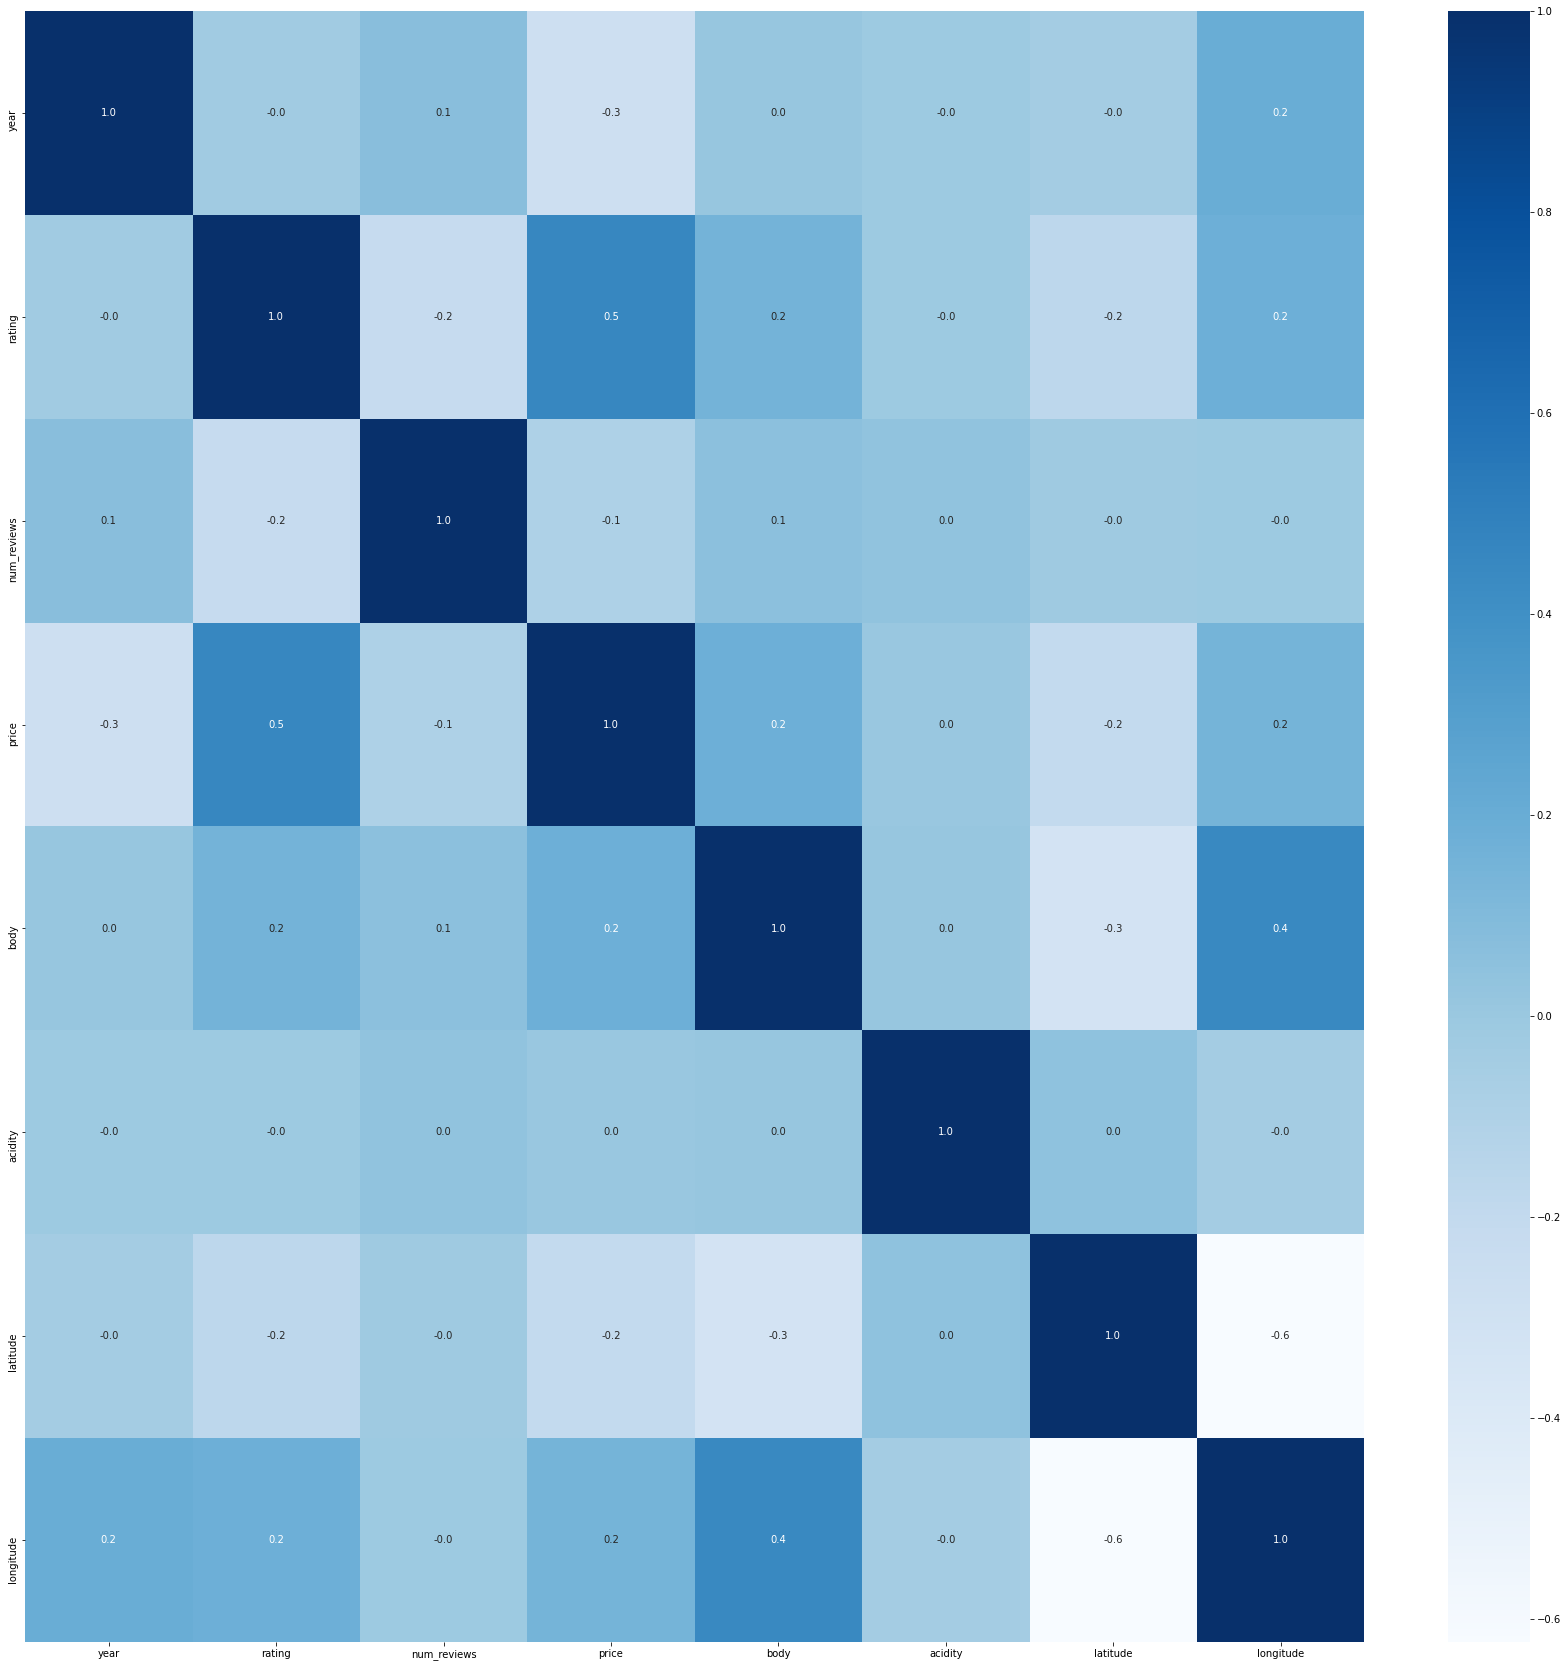

In [29]:
corrmat = merged.corr()
topcorr_fea = corrmat.index
plt.figure(figsize=(30,30))

t = sns.heatmap(clean[topcorr_fea].corr(), annot = True, fmt=".1f", cmap = 'Blues')
# plt.savefig("heat map.png")

<AxesSubplot:>

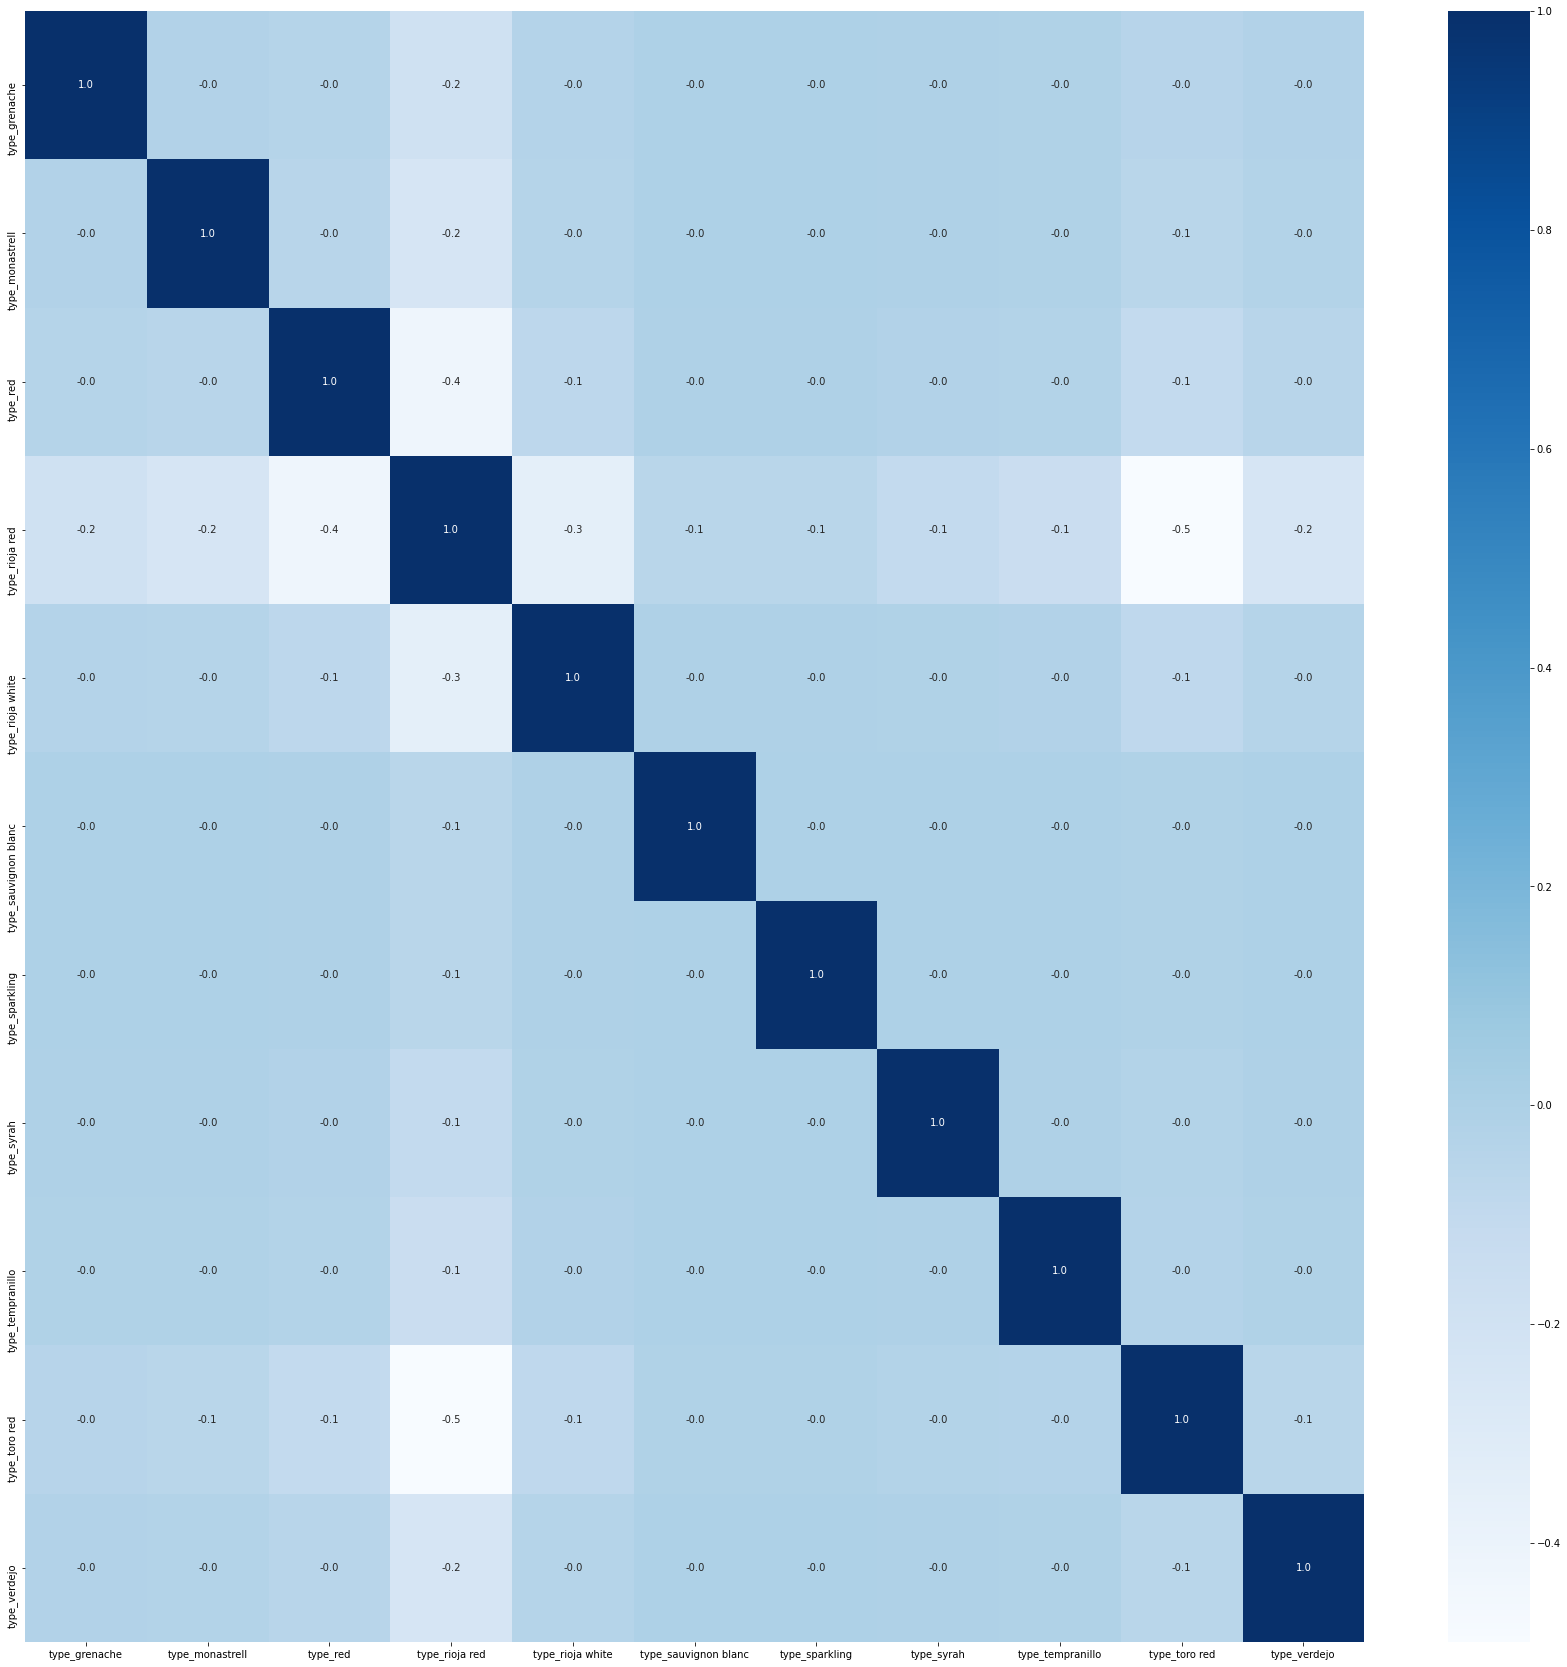

In [30]:
corrmat = clean.corr()
topcorr_fea = [c for c in corrmat.index if "type" in c]
plt.figure(figsize=(30,30))

sns.heatmap(clean[topcorr_fea].corr(), annot = True, fmt=".1f", cmap = 'Blues')

### 3. Find the number of unique wines in the data

In [31]:
len(merged.index.unique())

237

### 4. Identify outliers

# III. Model Building
## 1. Multiple regression

### 1.1 Model building
- reference case for `winery`: "age"
- reference case for `type`: "red"
- intercept added

In [32]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import GLMInfluence

In [33]:
X_train_linear = X_train[[c for c in X_train.columns if (c != "winery_age") & (c != "type_red")]]
model = sm.OLS(y_train, sm.add_constant(X_train_linear)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     3.092
Date:                Fri, 16 Dec 2022   Prob (F-statistic):           7.71e-17
Time:                        22:33:31   Log-Likelihood:                 449.84
No. Observations:                 472   AIC:                            -637.7
Df Residuals:                     341   BIC:                            -93.12
Df Model:                         130                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                                0.0996      0.188      0.531      0.596      -0.270       0.469
year                                                 0.0017      0.001      2.346      0.020       0.000       0.003
num_reviews                                      -1.477e-05   4.47e-06     -3.303      0.001   -2.36e-05   -5.97e-06
price                                                0.0004   4.37e-05      9.591      0.000       0.000       0.001
body                                                 0.0780      0.126      0.619      0.537      -0.170       0.326
acidity                                             -0.0663      0.296     -0.224      0.823      -0.648       0.515
latitude                                             0.0652      0.041      1.573      0.117      -0.016       0.147
longitude                                            0.0182      0.037      0.496      0.620      -0.054       0.090
winery_abel mendoza monge                            0.0762      0.142      0.536      0.592      -0.203       0.356
winery_allende                                       0.0681      0.119      0.571      0.568      -0.167       0.303
winery_alonso & pedrajo                              0.0319      0.162      0.197      0.844      -0.286       0.350
winery_alta alella                                   0.1075      0.213      0.504      0.614      -0.312       0.527
winery_altanza                                       0.0508      0.139      0.366      0.715      -0.222       0.324
winery_altos de rioja                               -0.0113      0.140     -0.081      0.936      -0.286       0.264
winery_alvaro palacios                               0.1066      0.142      0.753      0.452      -0.172       0.385
winery_artadi                                       -0.0078      0.138     -0.057      0.955      -0.279       0.263
winery_atalaya                                       0.0336      0.093      0.361      0.719      -0.149       0.217
winery_atlan & artisan                               0.1175      0.148      0.795      0.427      -0.173       0.408
winery_azpilicueta                                   0.0898      0.160      0.560      0.576      -0.226       0.405
winery_baigorri                                      0.0455      0.139      0.328      0.743      -0.228       0.319
winery_barahonda                                    -0.1537      0.164     -0.937      0.349      -0.476       0.169
winery_belondrade                                   -0.0267      0.114     -0.234      0.815      -0.251       0.197
winery_benjamin de rothschild - vega sicilia         0.1606      0.126      1.276      0.203      -0.087       0.408
winery_berceo                            

In [34]:
pred_mpr = model.predict(sm.add_constant(X_test[[c for c in X_train.columns if (c != "winery_age") & (c != "type_red")]]))

### 1.2 Prediction performance

In [35]:
# MSE Computation
from sklearn.metrics import mean_squared_error as MSE
mse_dtr = MSE(y_test, pred_mpr)
print("MSE : % f" %(mse_dtr))

# MAPE Compuatation
mape_mpr = np.mean(np.abs((y_test - pred_mpr)/y_test))*100
print('MAPE:', mape_mpr, '%.')

MSE :  0.025311
MAPE: 2.399636575159992 %.


### 1.3 Linearity Check

In [36]:
# fitted values (need a constant term for intercept)
model_fitted_y = model.fittedvalues

# model residuals
model_residuals = model.resid

# normalized residuals
model_norm_residuals = model.get_influence().resid_studentized_internal

# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# absolute residuals
model_abs_resid = np.abs(model_residuals)

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:696: RuntimeWarning: invalid value encountered in sqrt
  return self.resid / sigma / np.sqrt(1 - hii)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:696: RuntimeWarning: divide by zero encountered in divide
  return self.resid / sigma / np.sqrt(1 - hii)


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


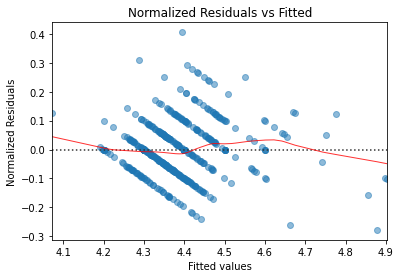

In [37]:
# Cited from https://github.com/vprayagala/OLS_LR_DiagnosticPlots/blob/master/ModelDiagnostics/Plot.py

def check_linearity_assumption(fitted_y, residuals):
        plot_1 = plt.figure()
        plot_1.axes[0] = sns.residplot(fitted_y, residuals,
                                       lowess=True,
                                       scatter_kws={'alpha': 0.5},
                                       line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

        plot_1.axes[0].set_title('Normalized Residuals vs Fitted')
        plot_1.axes[0].set_xlabel('Fitted values')
        plot_1.axes[0].set_ylabel('Normalized Residuals')
        plt.savefig("ResVsFitted.png")
check_linearity_assumption(model_fitted_y, model_residuals)

### 1.4 Normality Check

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


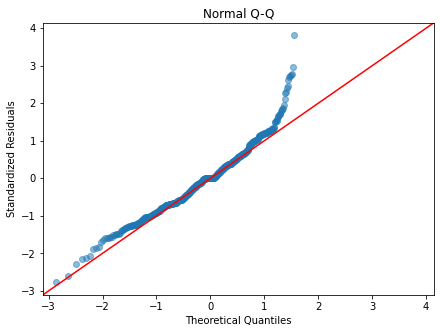

In [38]:
from statsmodels.graphics.gofplots import ProbPlot

QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)

plot_lm_2.set_figheight(5)
plot_lm_2.set_figwidth(7)

plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');

# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]

for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i, 
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));

### 1.5 Multicollinearity Check (VIF)

In [39]:
# Use variance inflation factor to identify any significant multi-collinearity
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# the independent variables set
x1 = X_train.loc[:,('year',
 'num_reviews',
 'price',
 'body',
 'acidity',
 'latitude',
 'longitude',
 'winery_abel mendoza monge',
 'winery_allende',
 'winery_alonso & pedrajo',
 'winery_alta alella',
 'winery_altanza',
 'winery_altos de rioja',
 'winery_alvaro palacios',
 'winery_artadi',
 'winery_atalaya',
 'winery_atlan & artisan',
 'winery_azpilicueta',
 'winery_baigorri',
 'winery_barahonda',
 'winery_belondrade',
 'winery_benjamin de rothschild - vega sicilia',
 'winery_berceo',
 'winery_beronia',
 'winery_bodega campo eliseo',
 'winery_bodega contador (benjamin romeo)',
 'winery_bodega elias mora',
 'winery_bodega juan carlos sancha',
 'winery_bodega numanthia',
 'winery_bodegas 6o elemento - vino sexto elemento',
 'winery_bodegas amaren',
 'winery_bodegas ateca',
 'winery_bodegas casa primicia',
 'winery_bodegas el nido',
 'winery_bodegas estraunza',
 'winery_bodegas faustino',
 'winery_bodegas frontaura',
 'winery_bodegas gama',
 'winery_bodegas monte la reina',
 'winery_bodegas olarra',
 'winery_bodegas roda',
 'winery_bodegas san roman',
 'winery_bodegas tierra',
 'winery_bodegas valdelana',
 'winery_breca',
 'winery_campillo',
 'winery_carlos moro',
 'winery_carlos serres',
 'winery_casa castillo',
 'winery_casa rojo',
 'winery_castano',
 'winery_castillo de cuzcurrita',
 'winery_contino',
 'winery_cuentavinas',
 'winery_david moreno',
 'winery_de moya',
 'winery_diez caballero',
 'winery_divina proporcion',
 'winery_dominio de anza',
 'winery_dominio del bendito',
 'winery_el coto',
 'winery_enrique mendoza',
 'winery_farina',
 'winery_federico paternina',
 'winery_finca valpiedra',
 'winery_galindo san millan',
 'winery_gomez cruzado',
 'winery_hacienda lopez de haro',
 'winery_hermanos pecina',
 'winery_huerta de albala',
 'winery_imperial',
 'winery_javi revert',
 'winery_javier sanz viticultor',
 'winery_jesus madrazo',
 'winery_jorge piernas',
 'winery_jose pariente',
 'winery_juan gil',
 'winery_la legua',
 'winery_la rioja alta',
 'winery_la vicalanda',
 'winery_lan',
 'winery_lar de paula',
 'winery_loxera',
 'winery_luis canas',
 'winery_marques de caceres',
 'winery_marques de la concordia',
 'winery_marques de murrieta',
 'winery_marques de riscal',
 'winery_marques de tomares',
 'winery_marques de vargas',
 'winery_matsu',
 'winery_miguel merino',
 'winery_mocen',
 'winery_monovar',
 'winery_monte real',
 'winery_muga',
 'winery_murua',
 'winery_murviedro',
 'winery_museum',
 'winery_naia',
 'winery_navajas',
 'winery_olivier riviere',
 'winery_ontanon',
 'winery_orben',
 'winery_ordonez',
 'winery_oxer wines',
 'winery_palacios remondo',
 'winery_penafiel',
 'winery_pintia',
 'winery_proyecto garnachas de espana',
 'winery_pujanza',
 'winery_quinta de la quietud',
 'winery_r. lopez de heredia',
 'winery_ramon bilbao',
 'winery_real de asua',
 'winery_remelluri',
 'winery_remirez de ganuza',
 'winery_rodriguez de vera',
 'winery_rodriguez sanzo',
 'winery_senorio de san vicente',
 'winery_shaya',
 'winery_sierra cantabria',
 'winery_sierra salinas',
 'winery_telmo rodriguez',
 'winery_teso la monja',
 'winery_tobia',
 'winery_torre de ona',
 'winery_valdecuevas',
 'winery_valenciso',
 'winery_valquejigoso',
 'winery_valserrano',
 'winery_vina pomal',
 'winery_vina real',
 'winery_vinedos de paganos',
 'winery_vinicola real',
 'winery_vinos sanz',
 'winery_vinyes del terrer',
 'winery_vivanco',
 'winery_volver',
 'type_grenache',
 'type_monastrell',
 'type_rioja red',
 'type_rioja white',
 'type_sauvignon blanc',
 'type_sparkling',
 'type_syrah',
 'type_tempranillo',
 'type_toro red')]
x1 = sm.add_constant(x1)

# conduct VIF
def calc_vif(df):
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return(vif)

calc_vif(x1)[0:9]

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1736: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,variables,VIF
0,const,0.000000
1,year,2.257057
2,num_reviews,1.497240
3,price,1.749848
4,body,499.122680
5,acidity,inf
6,latitude,inf
7,longitude,inf
8,winery_abel mendoza monge,1.636347


In [40]:
x2 = X_train.loc[:,('year', 'num_reviews', 'price', 'body', 'acidity', 'latitude', 'longitude')]
x2 = sm.add_constant(x2)
calc_vif(x2)

,variables,VIF
0,const,36119.336057
1,year,1.164458
2,num_reviews,1.027087
3,price,1.147054
4,body,1.402802
5,acidity,1.010652
6,latitude,1.842788
7,longitude,2.289779


### 1.6 Refine Model

In [41]:
X_train_linear_2 = X_train[['year', 'num_reviews', 'price', 'body', 'acidity', 'latitude', 'longitude']]
model_2 = sm.OLS(y_train, sm.add_constant(X_train_linear_2)).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     29.54
Date:                Fri, 16 Dec 2022   Prob (F-statistic):           1.00e-33
Time:                        22:33:37   Log-Likelihood:                 353.04
No. Observations:                 472   AIC:                            -690.1
Df Residuals:                     464   BIC:                            -656.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.8485      1.010      0.840      0.401      -1.137       2.834
year            0.0017      0.001      3.288      0.001       0.001       0.003
num_reviews -1.623e-05   3.89e-06     -4.173      0.000   -2.39e-05   -8.59e-06
price           0.0005   3.72e-05     12.405      0.000       0.000       0.001
body            0.0188      0.013      1.417      0.157      -0.007       0.045
acidity        -0.0035      0.052     -0.067      0.947      -0.106       0.099
latitude       -0.0035      0.006     -0.576      0.565      -0.015       0.008
longitude       0.0014      0.005      0.288      0.773      -0.008       0.011
==============================================================================
Omnibus:                       28.055   Durbin-Watson:                   2.200
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.437
Skew:                           0.621   Prob(JB):                     1.49e-07
Kurtosis:                       3.242   Cond. No.                     4.15e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.15e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
pred2 = model_2.predict(sm.add_constant(X_test[['year', 'num_reviews', 'price', 'body', 'acidity', 'latitude', 'longitude']]))
pred2

wine
coto de imaz rioja gran reserva    4.349594
blanc de neu                       4.314220
roda i reserva rioja               4.321494
amancio                            4.383750
finca cuesta clara raro reserva    4.372536
                                     ...   
reserva rioja (finca ygay)         4.230362
vina del olivo                     4.420093
onomastica rioja reserva           4.361074
reserva privada rioja              4.363909
granja gran reserva rioja          4.366124
Length: 119, dtype: float64

In [43]:
mse_2 = MSE(y_test, pred2)
print("MSE : % f" %(mse_2))

mape_2 = np.mean(np.abs((y_test - pred2)/y_test))*100
print('MAPE:', mape_2, '%.')

accuracy_2 = 100 - np.mean(mape_2)
print('Accuracy:', accuracy_2, '%.')

MSE :  0.021554
MAPE: 2.308045187432844 %.
Accuracy: 97.69195481256716 %.


## 2. Decision Trees

In [44]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz, _tree

### 2.1 Identify best max_depth

In [45]:
# reference: https://www.srose.biz/machine-learning/decision-trees-in-python/
depth = []
plots = []
for i in range(1,21):
    dtr = DecisionTreeRegressor(max_depth=i, random_state=33)
    scores_dtr = cross_val_score(estimator=dtr, X=X_train, y=y_train, cv = 5)
    data = dtr.fit(X_train, y_train)
    depth.append(scores_dtr.mean())
    plots = plots + [{"a":i, "b":j} for j in scores_dtr]

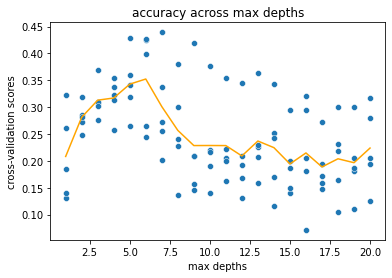

In [46]:
sns.scatterplot(data = pd.DataFrame(plots), x = "a", y = "b") # max_depth vs scores
sns.lineplot(x = range(1, 21), y = depth, color='orange') # average scores
plt.xlabel("max depths")
plt.ylabel("cross-validation scores")
plt.title("accuracy across max depths")
plt.show()

In [47]:
np.argmax(depth)+1

6

*We find the best max depth is at 6 with highest accuracy score.*

*__With the scaled data, results might look a little bit different.__*

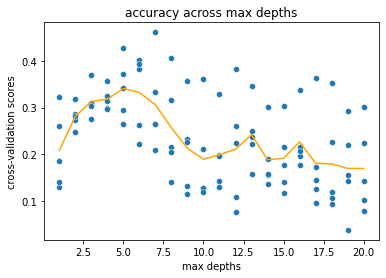

In [48]:
# for scaled version
depth2 = []
plots2 = []
for i in range(1,21):
    dtr2 = DecisionTreeRegressor(max_depth=i, random_state=33)
    scores_dtr2 = cross_val_score(estimator=dtr2, X=X_train3, y=y_train3, cv = 5)
    data2 = dtr2.fit(X_train3, y_train3)
    depth2.append(scores_dtr2.mean())
    plots2 = plots2 + [{"a":i, "b":j} for j in scores_dtr2]

sns.scatterplot(data = pd.DataFrame(plots2), x = "a", y = "b") # max_depth vs scores
sns.lineplot(x = range(1, 21), y = depth2, color='orange') # average scores
plt.xlabel("max depths")
plt.ylabel("cross-validation scores")
plt.title("accuracy across max depths")
plt.show()

In [49]:
np.argmax(depth2)+1

5

### 2.2 Make predictions

In [50]:
# using the max depth 6
dtr3 = DecisionTreeRegressor(max_depth=6)
dtr3.fit(X_train, y_train)

# prediction through decision tree
pred_dtr = dtr3.predict(X_test)

In [51]:
# for scaled version, max depth = 5
dtr5 = DecisionTreeRegressor(max_depth=5)
dtr5.fit(X_train3, y_train3)
pred_dtr5 = dtr5.predict(X_test3)

### 2.3 Prediction Performance

In [52]:
# compute MSE
mse_dtr = MSE(y_test, pred_dtr)
print("MSE : % f" %(mse_dtr))

# compute MAPE
mape_dtr = np.mean(np.abs((y_test - pred_dtr)/y_test))*100
print('MAPE:', mape_dtr, '%.')

MSE :  0.015985
MAPE: 2.1957443795716083 %.


In [53]:
# for scaled version
mse_dtr5 = MSE(y_test3, pred_dtr5)
print("MSE : % f" %(mse_dtr5))
mape_dtr5 = np.mean(np.abs((y_test3 - pred_dtr5)/y_test3))*100
print('MAPE:', mape_dtr5, '%.')

MSE :  0.015242
MAPE: 2.2093578609528803 %.


## 3. Random Forest

In [54]:
from sklearn.ensemble import RandomForestRegressor

### 3.1 Find max depth

In [55]:
depth_rfc = []
plots_rfc = []
for i in range(1, 21):
    rfc = RandomForestRegressor(max_depth=i, random_state=33)
    scores_rfc = cross_val_score(estimator=rfc, X=X_train, y=y_train, cv = 5)
    data_rfc = rfc.fit(X_train, y_train)
    depth_rfc.append(scores_rfc.mean())
    plots_rfc = plots_rfc + [{"a":i, "b":j} for j in scores_rfc]

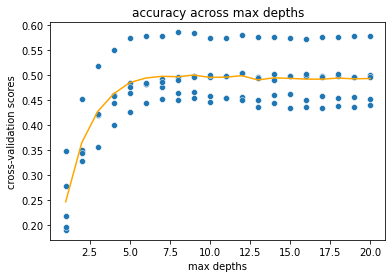

In [56]:
sns.scatterplot(data = pd.DataFrame(plots_rfc), x = "a", y = "b") # max_depth vs scores
sns.lineplot(x = range(1,21), y = depth_rfc, color='orange') # average scores
plt.xlabel("max depths")
plt.ylabel("cross-validation scores")
plt.title("accuracy across max depths")
plt.show()

In [57]:
np.argmax(depth_rfc)+1

9

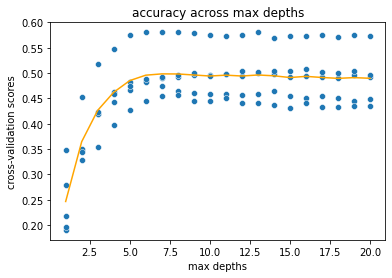

In [58]:
depth_rfc2 = []
plots_rfc2 = []
for i in range(1, 21):
    rfc2 = RandomForestRegressor(max_depth=i, random_state=33)
    scores_rfc2 = cross_val_score(estimator=rfc2, X=X_train3, y=y_train3, cv = 5)
    data_rfc2 = rfc.fit(X_train3, y_train3)
    depth_rfc2.append(scores_rfc2.mean())
    plots_rfc2 = plots_rfc2 + [{"a":i, "b":j} for j in scores_rfc2]
    
sns.scatterplot(data = pd.DataFrame(plots_rfc2), x = "a", y = "b") # max_depth vs scores
sns.lineplot(x = range(1,21), y = depth_rfc2, color='orange') # average scores
plt.xlabel("max depths")
plt.ylabel("cross-validation scores")
plt.title("accuracy across max depths")
plt.show()

In [59]:
np.argmax(depth_rfc2)+1

7

### 3.2 make predictions

In [60]:
# using max depth = 9
rfc7 = RandomForestRegressor(max_depth=9, random_state=33)
rfc7.fit(X_train, y_train)

pred_rfc = rfc7.predict(X_test)

In [61]:
# for scaled version, max depth = 7
rfc13 = RandomForestRegressor(max_depth=7, random_state=33)
rfc13.fit(X_train3, y_train3)
pred_rfc2 = rfc13.predict(X_test3)

### 3.3 Prediction Performance

In [62]:
mse_rfc = MSE(y_test, pred_rfc)
print("MSE : % f" %(mse_rfc))

mape_rfc = np.mean(np.abs((y_test - pred_rfc)/y_test))*100
print('MAPE:', mape_rfc, '%.')

MSE :  0.010239
MAPE: 1.800653415505461 %.


In [63]:
mse_rfc2 = MSE(y_test3, pred_rfc2)
print("MSE : % f" %(mse_rfc2))

mape_rfc2 = np.mean(np.abs((y_test3 - pred_rfc2)/y_test3))*100
print('MAPE:', mape_rfc2, '%.')

MSE :  0.010265
MAPE: 1.8178547925996709 %.


### 3.4 Feature importance for decision tree and random forest
Feature importance scores can provide insight into the dataset. The relative scores can highlight which features may be most relevant to the target, and the converse, which features are the least relevant.

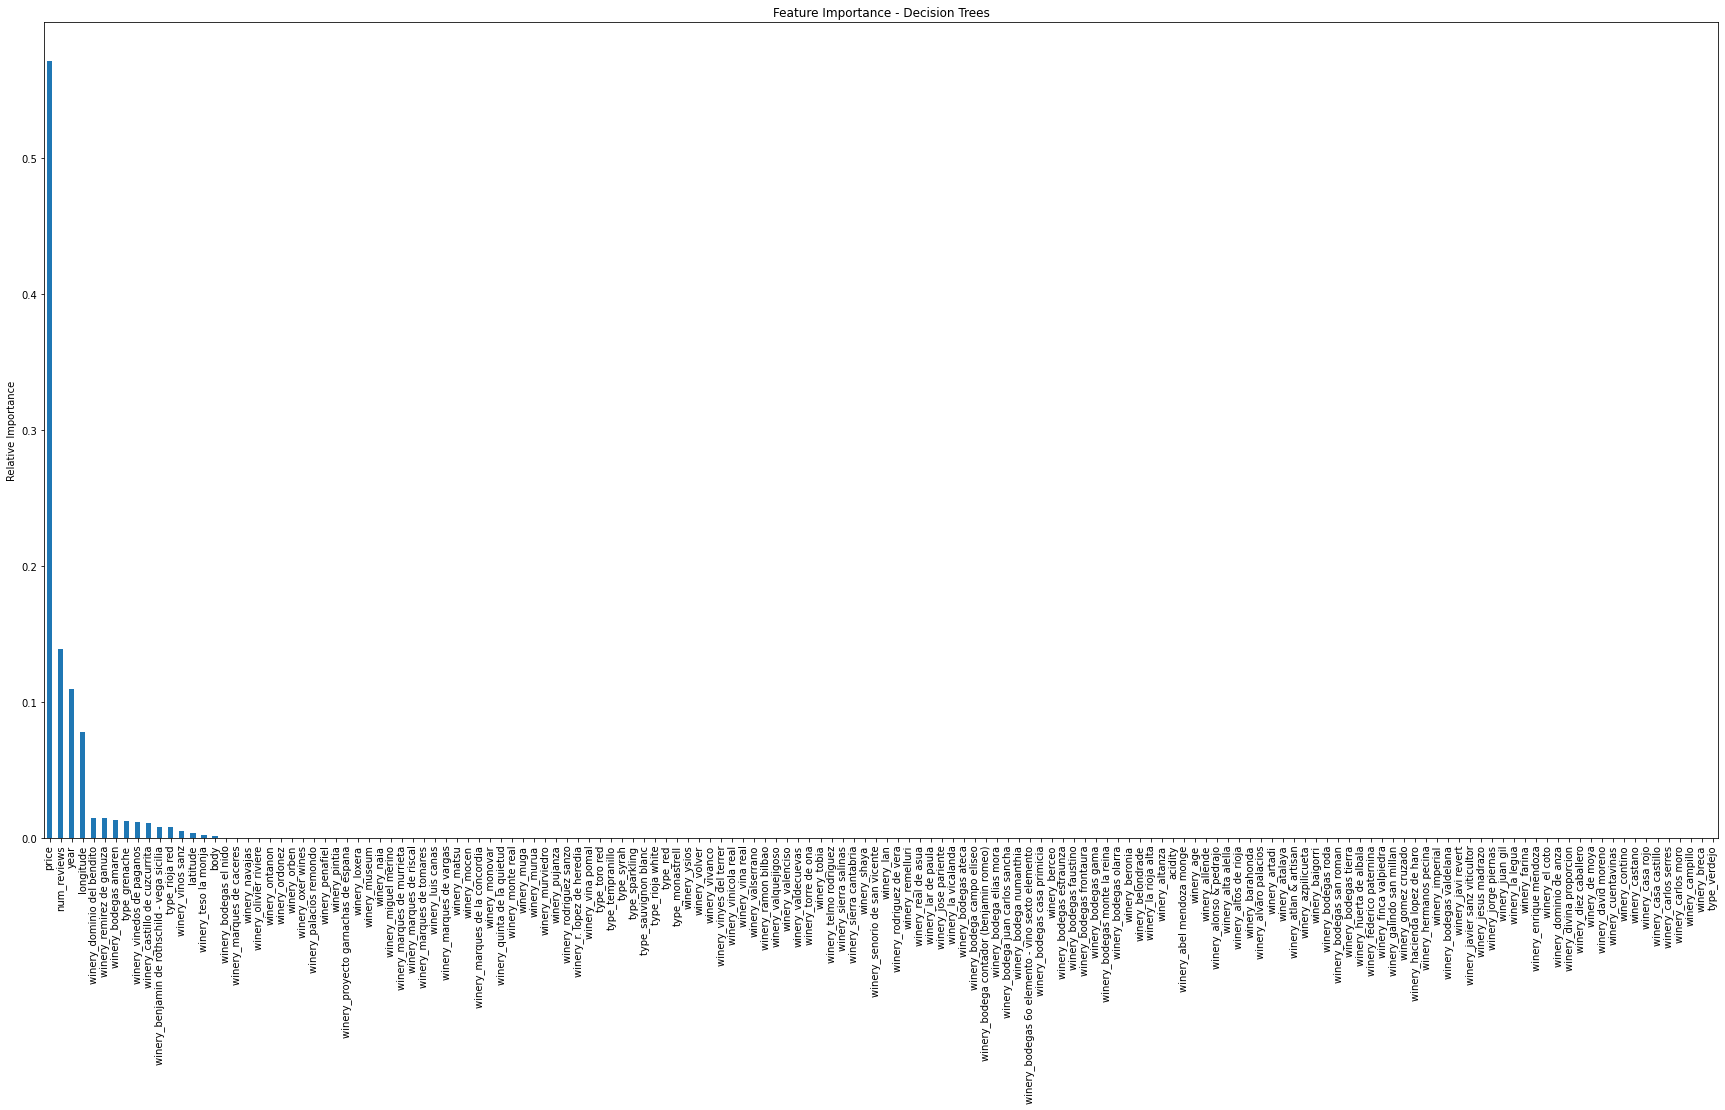

In [64]:
# reference: https://machinelearningmastery.com/calculate-feature-importance-with-python/

feature_imp = pd.Series(dtr3.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(30,15))
ax = feature_imp.plot(kind='bar')
ax.set(title='Feature Importance - Decision Trees', ylabel='Relative Importance');

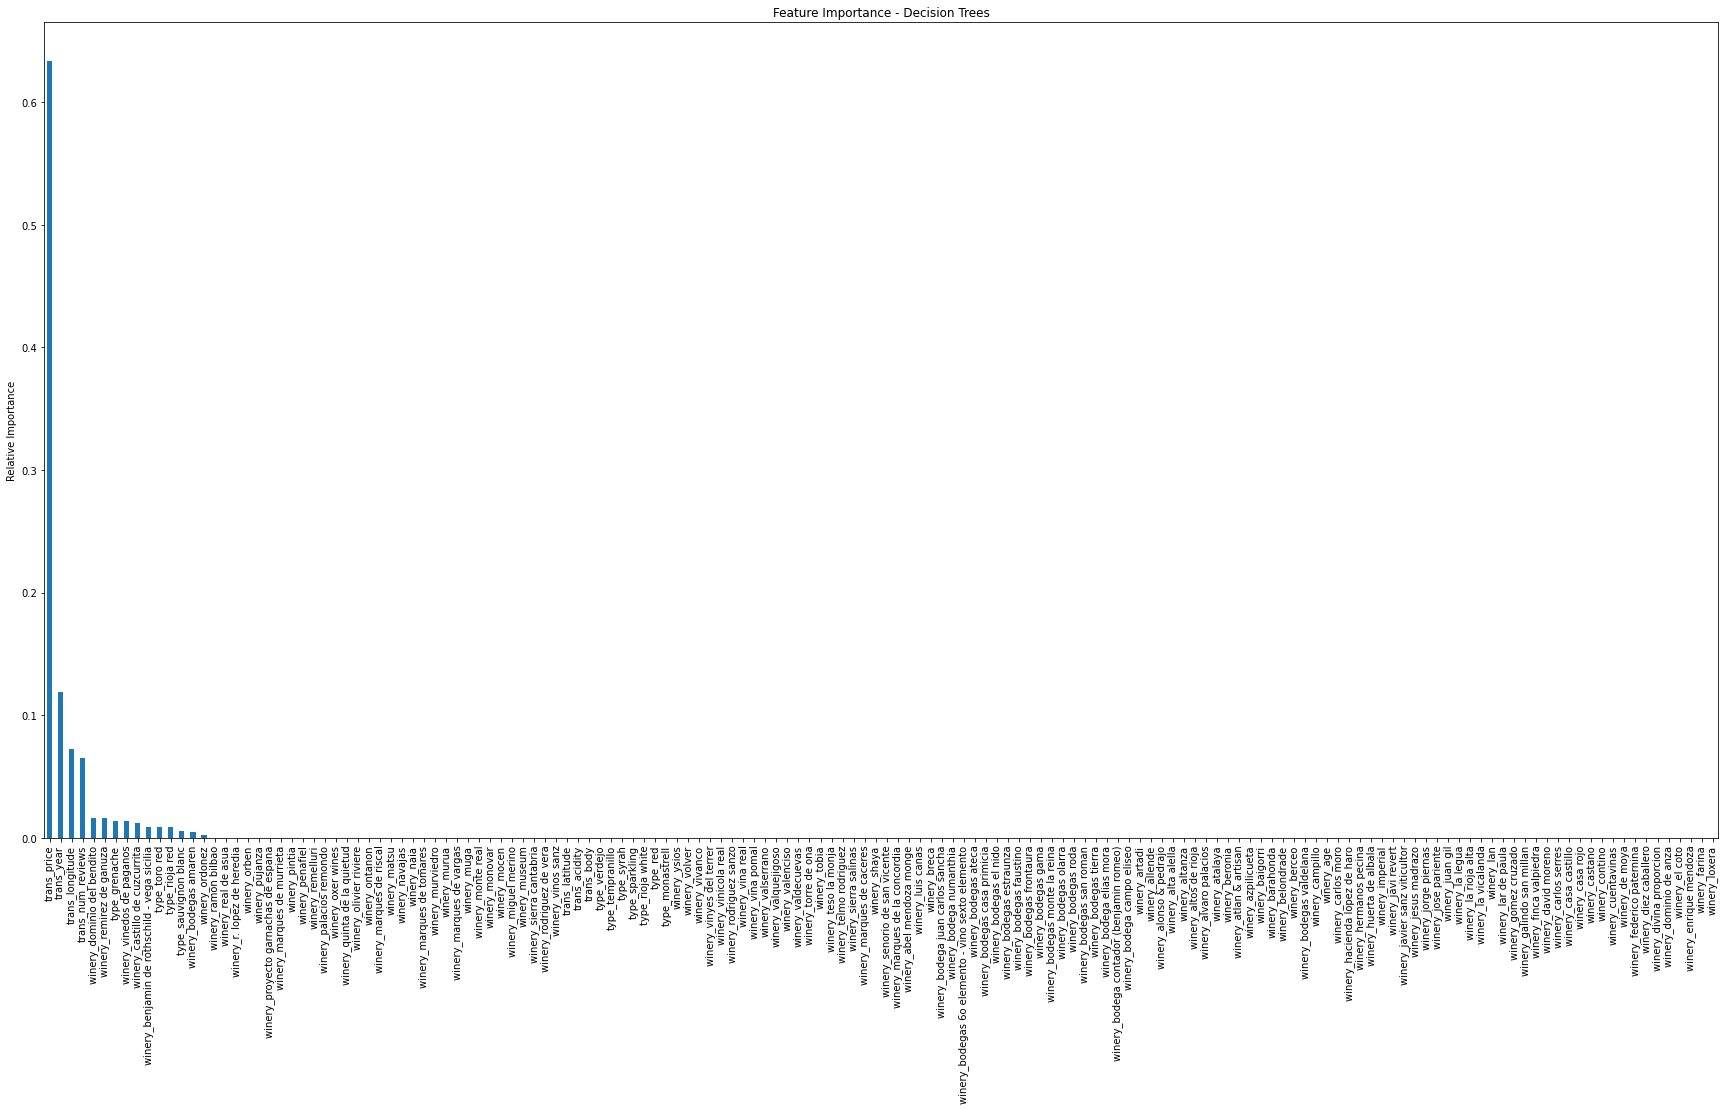

In [65]:
# feature importance based on the scaled data - should be more precise
feature_imp = pd.Series(dtr5.feature_importances_, index=X3.columns).sort_values(ascending=False)

plt.figure(figsize=(30,15))
ax = feature_imp.plot(kind='bar')
ax.set(title='Feature Importance - Decision Trees', ylabel='Relative Importance');

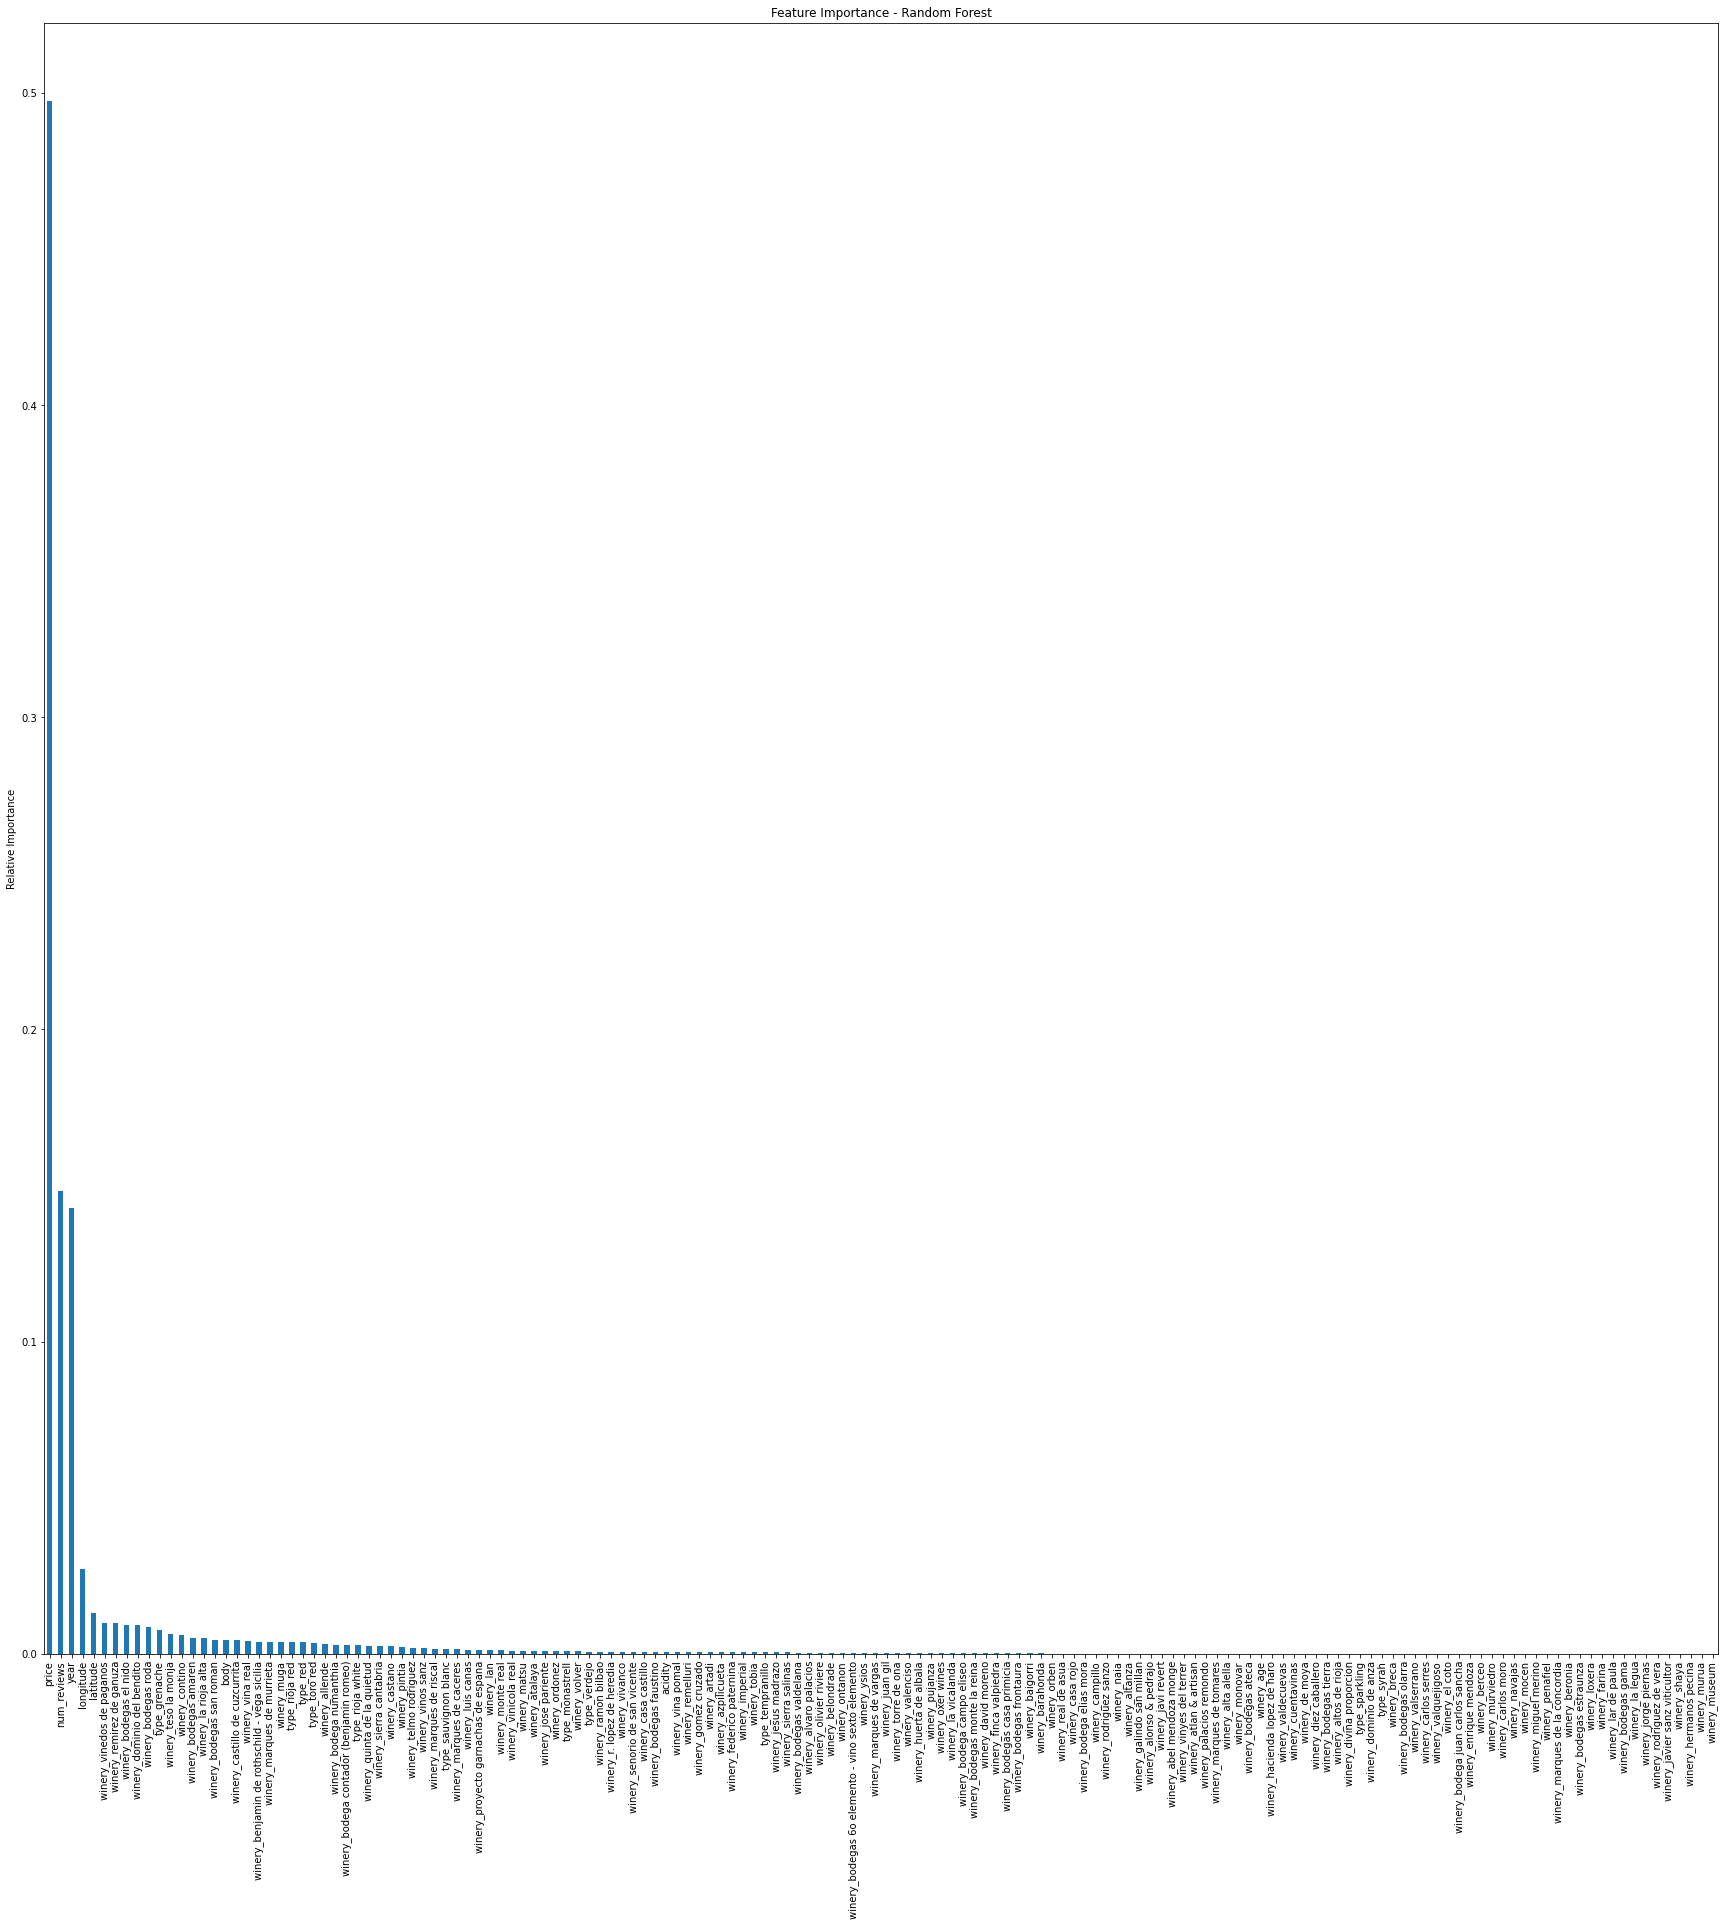

In [66]:
feature_imp = pd.Series(rfc7.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(30,30))
ax = feature_imp.plot(kind='bar')
ax.set(title='Feature Importance - Random Forest', ylabel='Relative Importance');

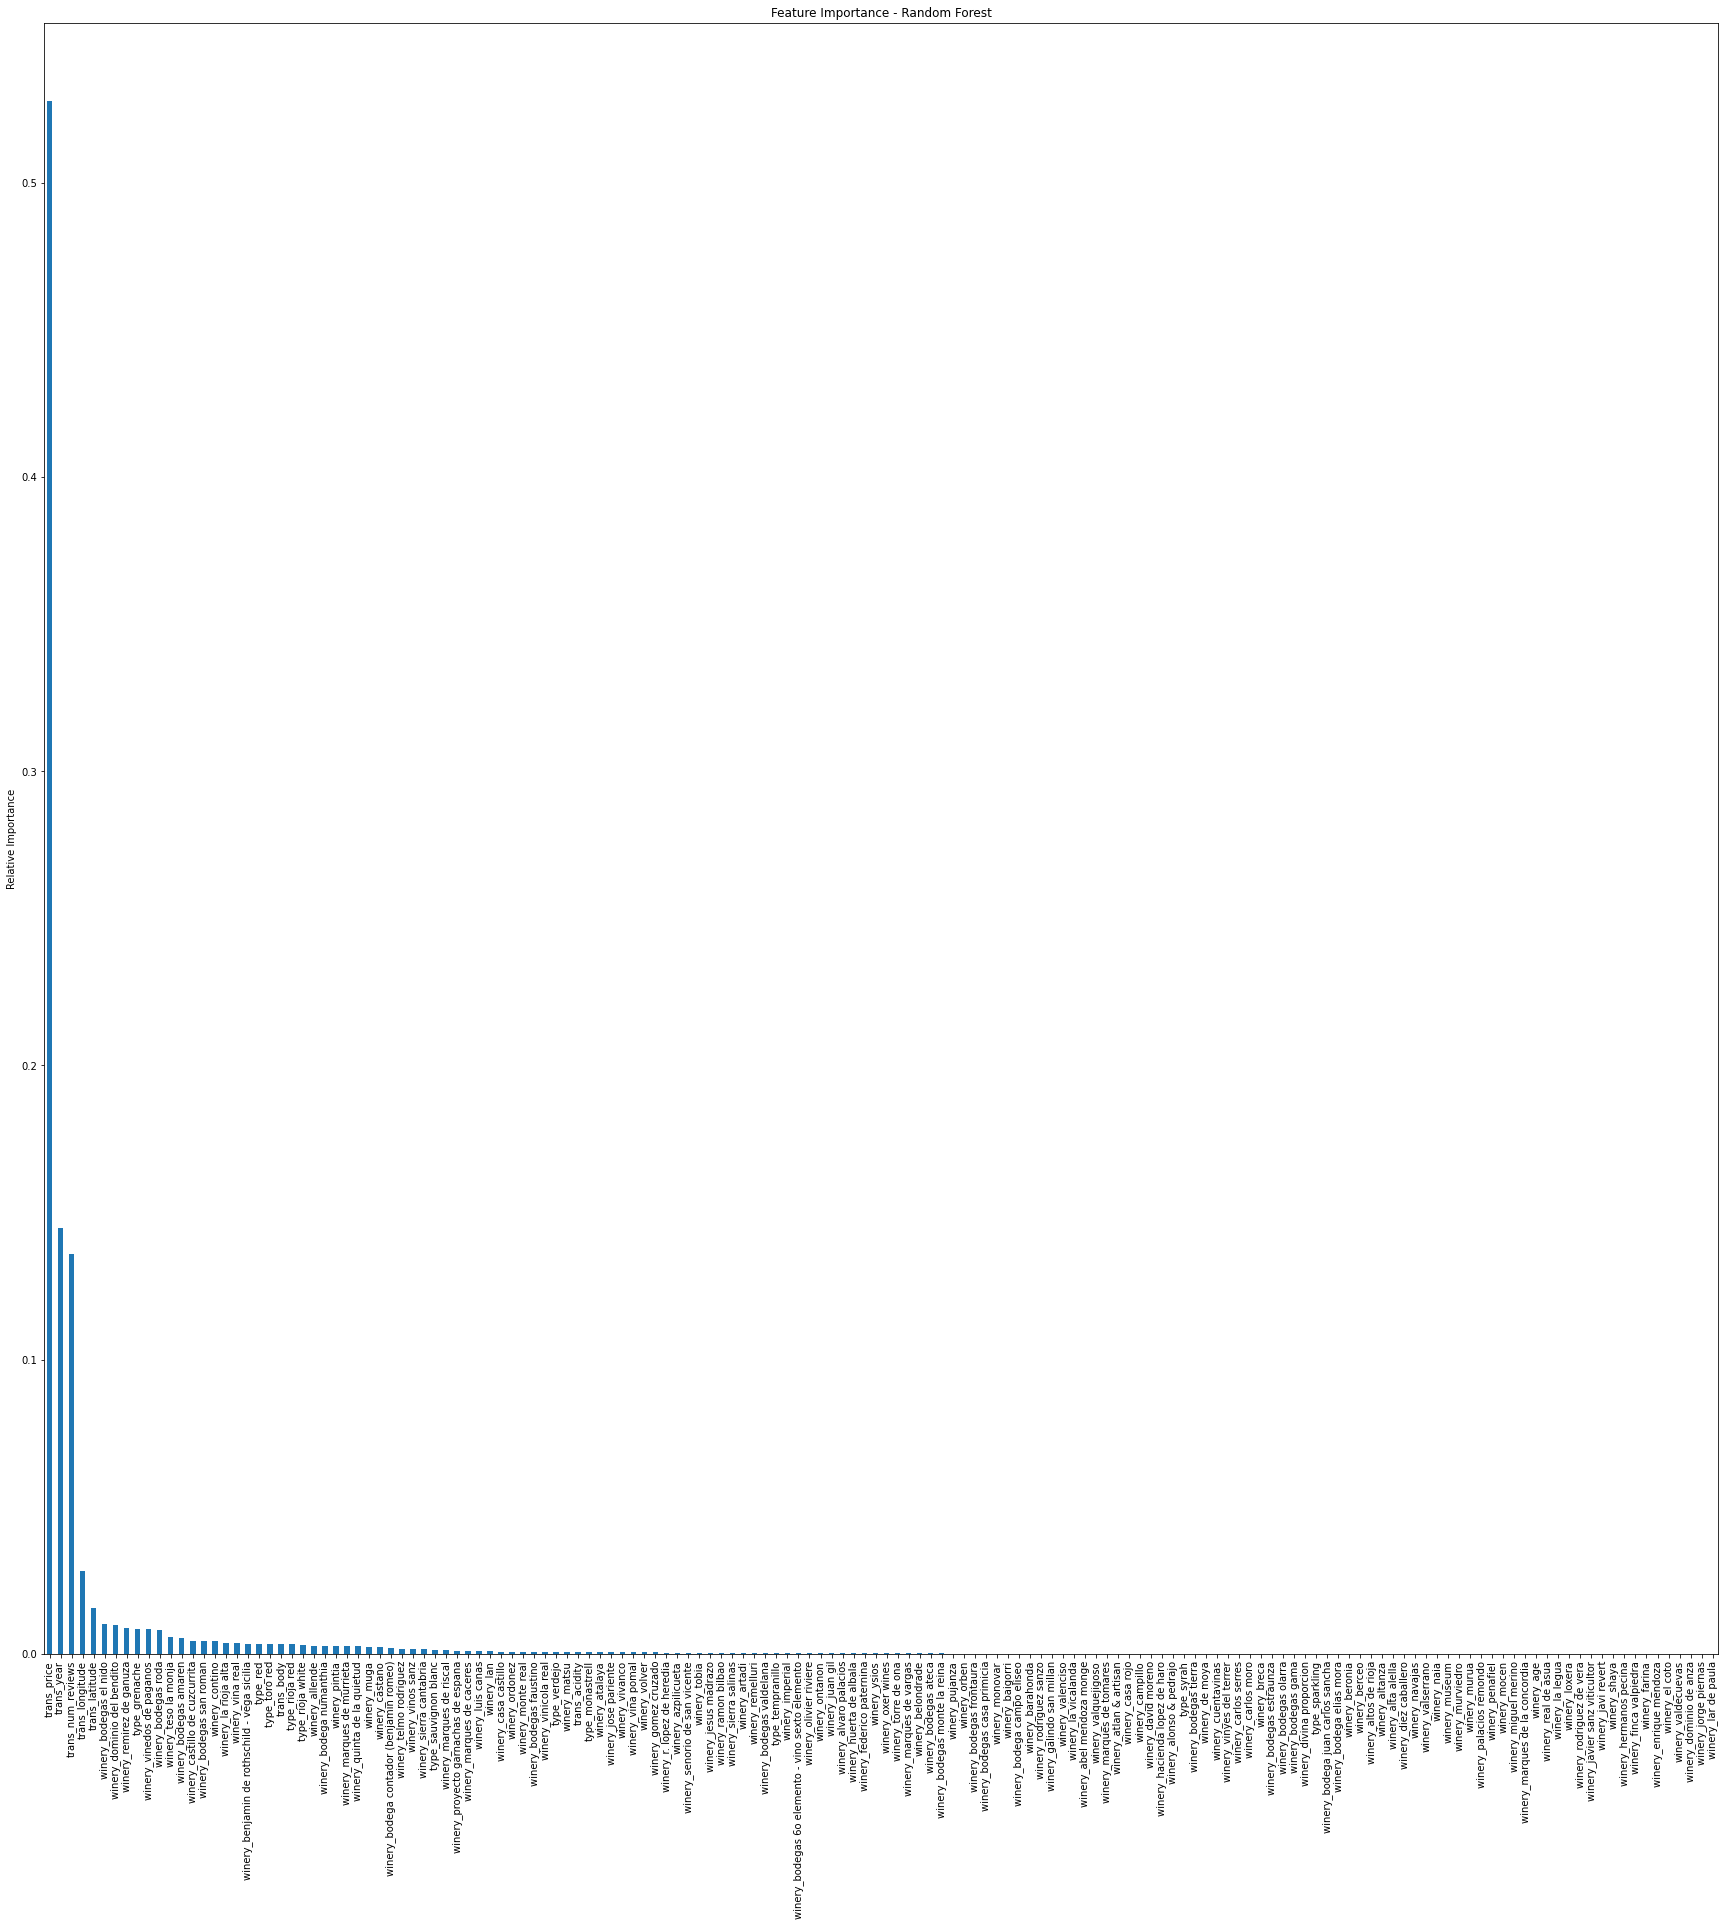

In [67]:
feature_imp = pd.Series(rfc13.feature_importances_, index=X3.columns).sort_values(ascending=False)

plt.figure(figsize=(30,30))
ax = feature_imp.plot(kind='bar')
ax.set(title='Feature Importance - Random Forest', ylabel='Relative Importance');
plt.savefig("RF_importance.png")

## 4. Neural Network
*Please refer to the other notebook as it was run on Colab.*